# ARTIFICIAL NEURAL NETWORK FOR REGRESSION

In [34]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
# model dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Create connection to remote MySQL database
hostname = "gator3228.hostgator.com"
username = "rbrennan_sm_jb"
password = "This_is_not_the_password"
database = "rbrennan_stock_project_4"
# Create a database connection
db_url = f"mysql+mysqlconnector://{username}:{password}@{hostname}/{database}"
engine = create_engine(db_url)
# Test the connection
try:
    conn = engine.connect()
    print("Connected to MySQL database")
except Exception as e:
    print("Error:", e)
nikola_df = pd.read_sql("SELECT * FROM Nikola", conn)

nikola_df.head()

Connected to MySQL database


,Date,Open,High,Low,Close,Volume
0,2018-06-12,9.56,9.56,9.56,9.56,300000
1,2018-06-13,9.57,9.58,9.56,9.57,179100
2,2018-06-14,9.57,9.57,9.57,9.57,0
3,2018-06-15,9.57,9.57,9.57,9.57,0
4,2018-06-18,9.54,9.58,9.54,9.58,300


In [3]:
# Set date column as the index
nikola_df.set_index('Date', inplace=True)

nikola_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-06-12,9.56,9.56,9.56,9.56,300000
2018-06-13,9.57,9.58,9.56,9.57,179100
2018-06-14,9.57,9.57,9.57,9.57,0
2018-06-15,9.57,9.57,9.57,9.57,0
2018-06-18,9.54,9.58,9.54,9.58,300


In [4]:
# Obtain info on DF columns
nikola_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1326 entries, 2018-06-12 to 2023-09-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1326 non-null   float64
 1   High    1326 non-null   float64
 2   Low     1326 non-null   float64
 3   Close   1326 non-null   float64
 4   Volume  1326 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 62.2 KB


In [5]:
# Investigate correlation between target (Close) and features
nikola_df.corr()['Close'].sort_values(ascending=False)

Close     1.000000
High      0.997549
Low       0.993739
Open      0.991691
Volume   -0.033697
Name: Close, dtype: float64

In [10]:
# # Heatmap viz of correlations
# plt.figure(figsize=(12,10))
# mask = np.zeros_like(nikola_df.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(data=nikola_df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [11]:
# MODEL PREPERATION AND TRAINING
X = nikola_df.drop('Close', axis=1).values
y = nikola_df['Close'].values

print(X)
print(y)

[[9.560000e+00 9.560000e+00 9.560000e+00 3.000000e+05]
 [9.570000e+00 9.580000e+00 9.560000e+00 1.791000e+05]
 [9.570000e+00 9.570000e+00 9.570000e+00 0.000000e+00]
 ...
 [8.710000e-01 1.190000e+00 8.550000e-01 2.356704e+08]
 [1.330000e+00 1.380000e+00 1.150000e+00 2.714541e+08]
 [1.240000e+00 1.630000e+00 1.230000e+00 3.065125e+08]]
[9.56 9.57 9.57 ... 1.15 1.19 1.59]


In [12]:
# Split the data for training as testing 
# Testing initially set to 20% of data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1060, 4)
(266, 4)
(1060,)
(266,)


In [13]:
# Scaling the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[ 0.47513186  0.41948844  0.525156   -0.21685472]
 [ 0.46619966  0.43346254  0.50373226 -0.23920601]
 [-0.54671254 -0.54302518 -0.57378458  0.02251579]
 ...
 [-0.78430922 -0.77084406 -0.81821    -0.08041973]
 [-0.15726834 -0.18308828 -0.12583362 -0.50190396]
 [-0.53331423 -0.51168949 -0.53970136 -0.30322152]]
[[ 0.37419802  0.5113783   0.40635161 -0.29513433]
 [-0.24123108 -0.23517326 -0.23003091 -0.21769835]
 [-0.86648552 -0.85468818 -0.90390497 -0.27747956]
 ...
 [ 0.40992685  0.35978126  0.40985731 -0.2467534 ]
 [-0.93169063 -0.91651264 -0.98083568  0.81942086]
 [-0.2117548  -0.23051526 -0.27969504  0.51670069]]


In [15]:
# Define Artificial Neural Net
art_nnet = Sequential()

# Adding First Hidden Layer
art_nnet.add(Dense(units=6, activation="relu")) 

# Adding Second Hidden Layer
art_nnet.add(Dense(units=6, activation="relu")) 

# Output Layer
art_nnet.add(Dense(units=1))


In [17]:
# Compiling the model
art_nnet.compile(optimizer="adam",loss="mean_squared_error")

In [18]:
# Train the model 
art_nnet.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test) \
             ,callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/100
34/34 [==============================] - 2s 15ms/step - loss: 254.6948 - val_loss: 225.9527
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 249.4006 - val_loss: 220.0141
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 242.0304 - val_loss: 212.2480
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 232.3476 - val_loss: 202.2498
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 220.1994 - val_loss: 189.2732
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 203.9646 - val_loss: 173.0191
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 182.9879 - val_loss: 149.8872
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 150.7639 - val_loss: 115.7444
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 112.1466 - val_loss: 82.8827
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss:

In [19]:
# Evaluating the loss 
loss_history = pd.DataFrame(art_nnet.history.history)
loss_history

,loss,val_loss
0,254.694839,225.952728
1,249.400589,220.014069
2,242.030396,212.247971
3,232.347595,202.249817
4,220.199432,189.273163
...,...,...
95,0.598266,0.239782
96,0.595979,0.239998
97,0.570026,0.241869
98,0.790582,0.227967


Text(0, 0.5, 'Loss')

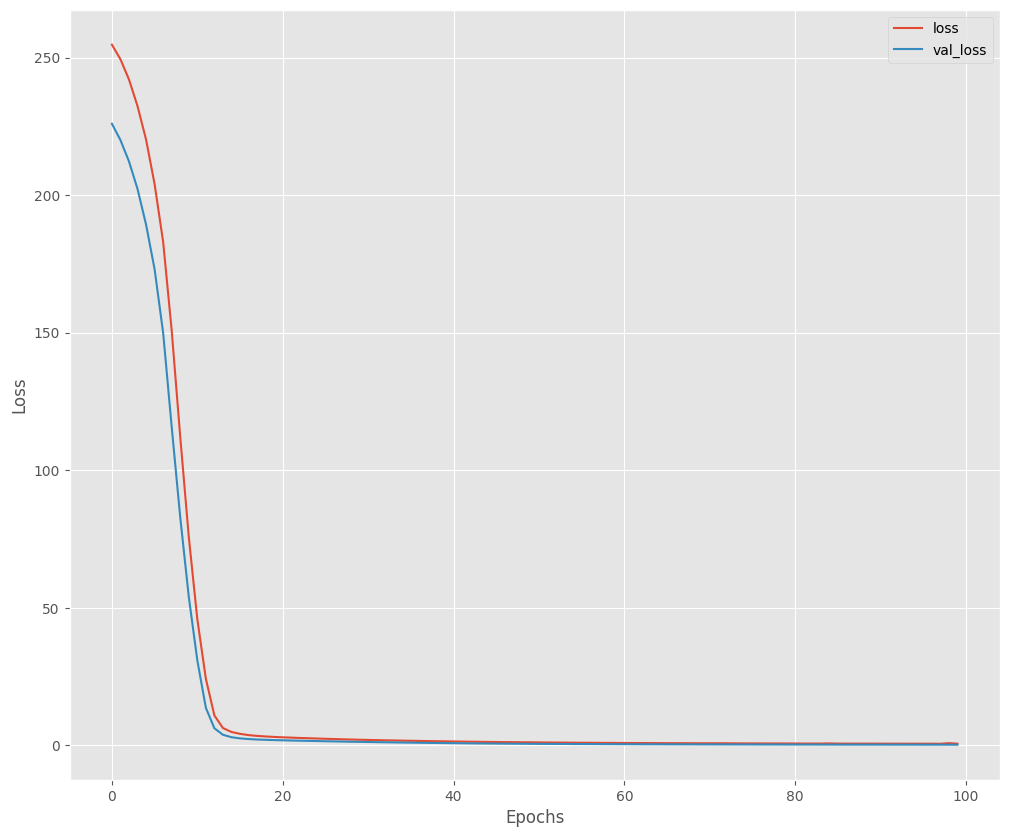

In [21]:
# Visualize the loss DF above 
plt.style.use("ggplot")
pd.DataFrame(art_nnet.history.history).plot(figsize=(12,10))
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [25]:
# Evaluate the Training & Testing 
print(f'Training Evaluation: {art_nnet.evaluate(X_train, y_train)}')
print(f'Testing Evaluation: {art_nnet.evaluate(X_test, y_test)}')


 1/34 [..............................] - ETA: 1s - loss: 0.1599

34/34 [==============================] - 0s 3ms/step - loss: 0.5596
Training Evaluation: 0.559613823890686
9/9 [==============================] - 0s 2ms/step - loss: 0.2205
Testing Evaluation: 0.22045694291591644


In [26]:
# Make Predictions 
ann_predictions = art_nnet.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(ann_predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df

9/9 [==============================] - 0s 4ms/step


,Real Values,Predictions
0,16.510000,16.822966
1,9.140000,9.256567
2,2.130000,2.852194
3,9.650000,9.667354
4,1.100000,0.815556
...,...,...
261,9.580000,9.596412
262,10.060000,10.082874
263,16.139999,16.021330
264,1.380000,0.825264


In [27]:
# Check shapes of test-target and predictions 
print(y_test.shape)
print(ann_predictions.shape)

(266,)
(266, 1)


c:\Users\justi\anaconda3\envs\tensorflow\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\justi\anaconda3\envs\tensorflow\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Actual Values')

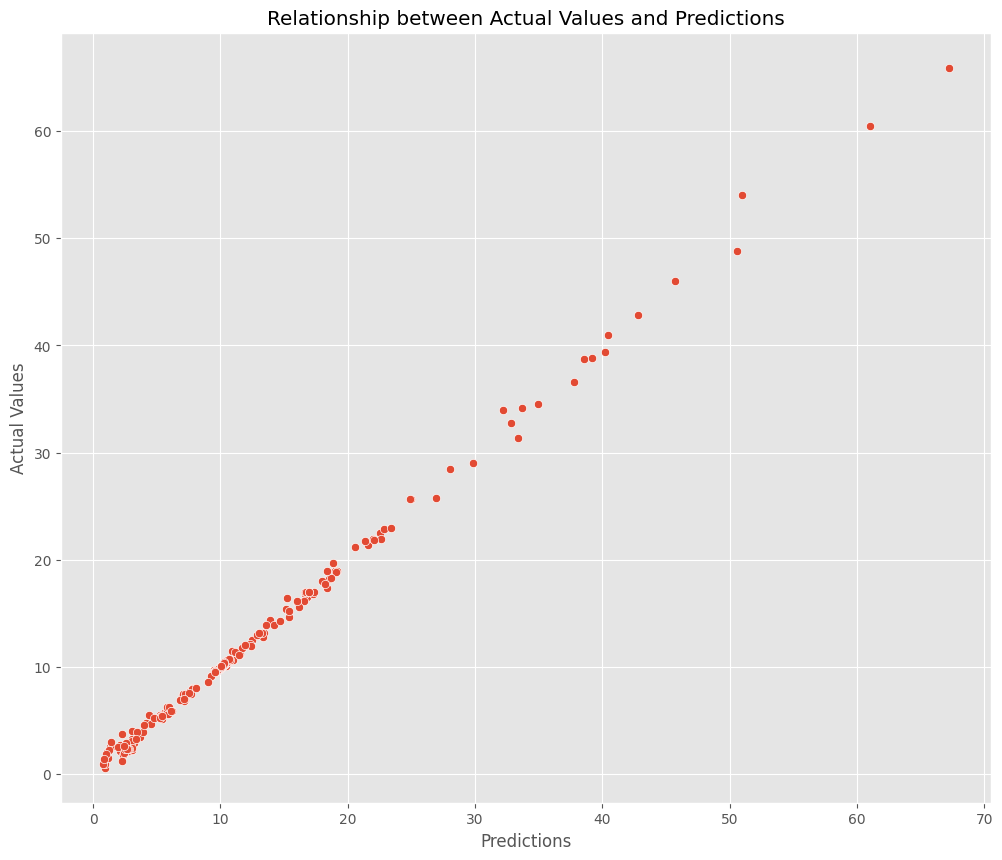

In [33]:
# Visualize test values against predictions
plt.figure(figsize=(12,10))
sns.scatterplot(x=np.ravel(ann_predictions),y=y_test)
plt.title("Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [35]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
# Evaluate the model performance with the residual of squares and the explained variance score

# Mean Absolute Error
print("MAE:",metrics.mean_absolute_error(y_test,ann_predictions))
# Mean Squared Error
print ("MSE:",metrics.mean_squared_error(y_test,ann_predictions))
# Square Root of MSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,ann_predictions)))
# Explained Variance Score, which shows how correctly the model predicts the target as a %, the closer to 100% the better
print("EVS:",metrics.explained_variance_score(y_test,ann_predictions))

MAE: 0.26696223007440206
MSE: 0.2204569073831979
RMSE: 0.46952838826124016
EVS: 0.9976499191456328


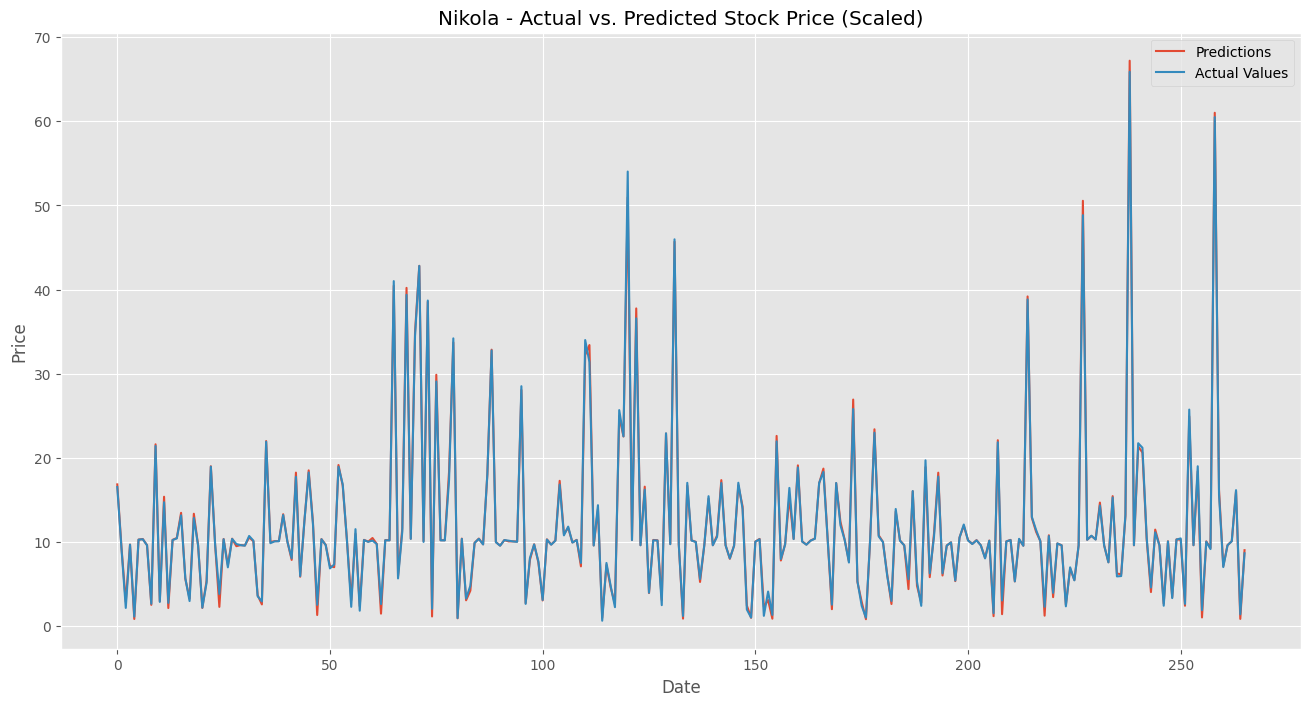

In [43]:
plt.figure(figsize=(16,8))
#plt.plot(test_data['Date'], test_data[target_xgb], label='Actual')
#plt.plot(test_data['Date'], xgb_predictions, label='Predicted')
plt.plot(ann_predictions, label='Predictions')
plt.plot(y_test, label='Actual Values')
plt.legend(loc='upper right')
#plt.xticks(nikola_df.index)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Nikola - Actual vs. Predicted Stock Price (Scaled)')
plt.show()